# Lecture 5 : Solving nonlinear systems

*May, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

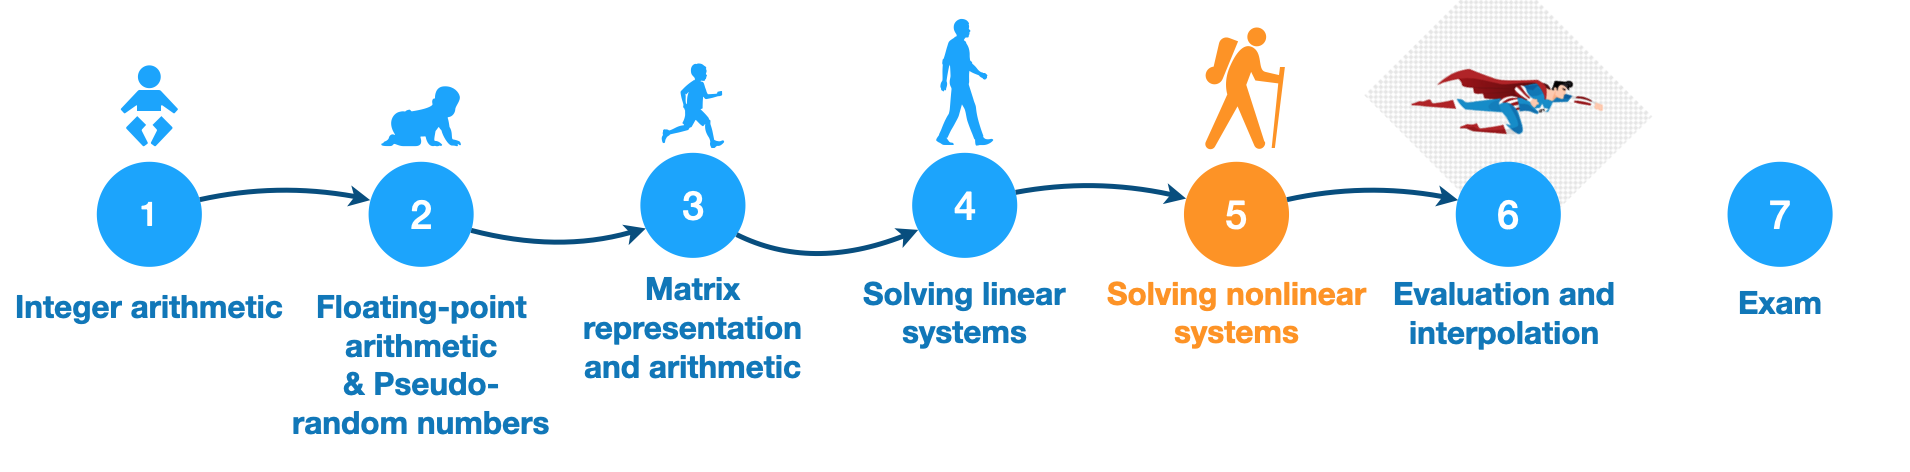

# Table of contents

1. [Objective](#1)

2. [Bisection method](#2)

3. [Fixed-point iteration method](#3)

4. [Newton's method](#4)

5. [Exercices](#E)
    - [Exercice 1](#E1): `bisection` algorithm
    - [Exercice 2](#E2): `fixed_point` algorithm
    - [Exercice 3](#E3): `newton` algorithm



6. [Solving $A\times X = B$](#6)
    - [(optional) Exercice 4](#E4): (**linear algebra**) LU decomposition
    - [(optional) Exercice 5](#E5): (**linear algebra**) Matrix inversion

## 1. Objective <a name="1"></a>

### 1.1. Nonlinear systems

In **linear systems**:
$$
\begin{bmatrix}
   a_{0,0}  & a_{0,1} & \cdots & a_{0,n-1} \\
   a_{1,0}  & a_{1,1} & \cdots & a_{1,n-1} \\
    & \vdots & \\
   a_{n-1,0} & a_{n-1,1} & \cdots & a_{n-1,n-1}
\end{bmatrix} \times \begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_{n-1}
\end{bmatrix} = \begin{bmatrix}
b_0\\
b_1\\
\vdots\\
b_{n-1}
\end{bmatrix}\iff Ax - b = 0
$$

In **nonlinear systems**:
$$
f(x) = 0
$$

We wish to find a solution to the non linear equation $f(x) = 0$ with $x = \begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_{n-1}
\end{bmatrix}$ the unkwown variable in the form of a "floating point" number. An equation of this type may have none, one or more solutions. We will assume that it has at least one which we will try to determine.


### 1.2. Condition number

We quantity the **condition number** that measures how sensitive the output of a function is on its input:

$$
\text{change in output} = \text{condition number}\times \text{change in input}
$$


- **for a linear system $Ax = b$:** a condition number gives a bound on how inaccurate the solution $x$ will be after approximation. If $A$ is invertible, the associated condition number is: $$\kappa(A) = \lvert\lvert A^{-1}\lvert\lvert_2\cdot\lvert\lvert A\lvert\lvert_2$$


- **for a nonlinear function $f$:** a condition number measures how sensitive a $f$ is to changes (or errors) in the input.
The associated condition number is: 
    - for one variable: 
    $$
    \kappa(x) = \left\lvert  \dfrac{xf'(x)}{f(x)}  \right\lvert
    $$
    - for several variables: 
    $$
    \kappa(x) = \dfrac{\lvert\lvert x\lvert\lvert_2 \cdot \lvert\lvert J(x)\lvert\lvert_2 }{\lvert\lvert f(x)\lvert\lvert_2} 
    $$
    with where $J ( x )$ is the Jacobian matrix

### 1.3. Order of convergence

a solution $x^*$ is called **simple** if $f(x^*) = 0$ and $f'(x^*) \neq 0$

- **order/rate of convergence:** The rate or order of convergence for $x_k$ obtained at the $k$-th iteration, is characterized by $q$ (*order*) or $r$ (*rate*) such that

$$
\lim\limits_{k\to\infty} \dfrac{ x_{k+1} - x^* }{ \lvert\lvert x_{k} - x^* \lvert\lvert^q } = r
$$

- for each iteration we are $q$ times more precise.

- if $q=1$ the convergence is called a **linear convergence**,
- $q=2$ is called **quadratic convergence**,
- $q=3$ is called **cubic convergence**.

## 2. Bisection method <a name="2"></a>

- We want to solve $f(x) = 0$, knowing that the root $r$ belongs to $[a, b]$ and that $f(a)\times f(b) < 0$ (in other words, $f(a)$ and $f(b)$ have opposite signs). We assume that we have an unique solution in this interval.


- We consider the middle $m = \dfrac{b+a}{2}$ of the interval $[a, b]$


- If $f(m)$ is of the sign of $f(a)$ then replace $a$ by $m$, otherwise $b$ by $m$


- The operation is repeated until the interval size corresponds to the desired accuracy

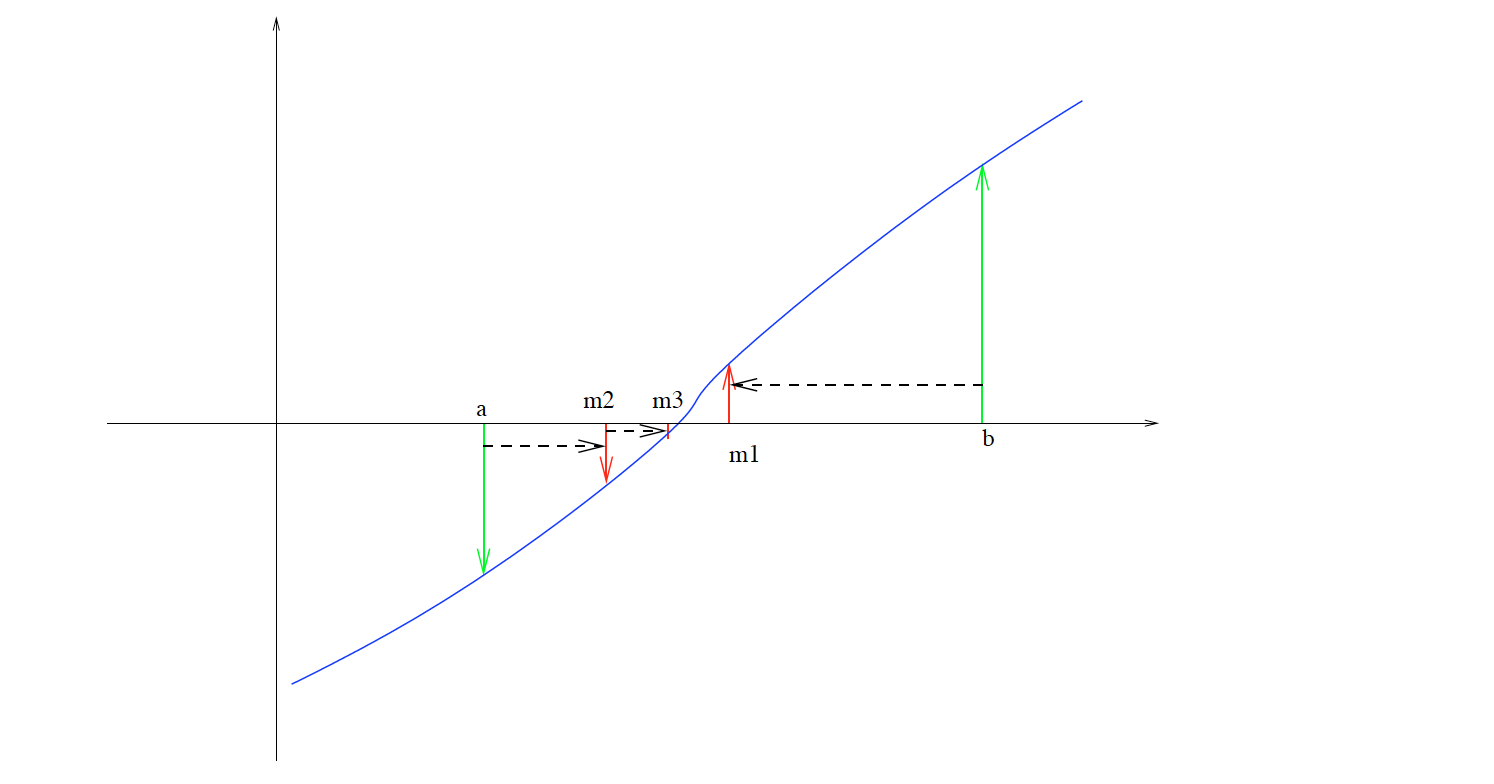

### Pseudo-code

```
bisection(f, a, b, eps)
    Input : function f, extremities a and b, precision eps
    Output : m such that |b-a| < eps
    
    while b - a >= eps do:
        m = (a+b)/2
        if f(a) x f(m) > 0 do:
            a = m
        else:
            b = m
```

**Remarks:**

- At each iteration the interval decreases by half


- The convergence is **linear** ($q=1$)

## 3. Fixed-point iteration method <a name="3"></a>

- Given a function $g$, we call a fixed point, a value $x$ such that: $g(x) = x$


- Schema for finding a fixed point, with iteration:
$$
x_{k+1} = g(x_k)
$$


- Solving the equation $f(x) = 0$ can be done via a fixed point iterative approach. For one equation, there can be several approaches. But not all of them converge.


- **Example:** for $f(x) = x^2 -x -5$, we set $g(x) = x^2 - 5$ or $g(x) = \sqrt{x+5}$.

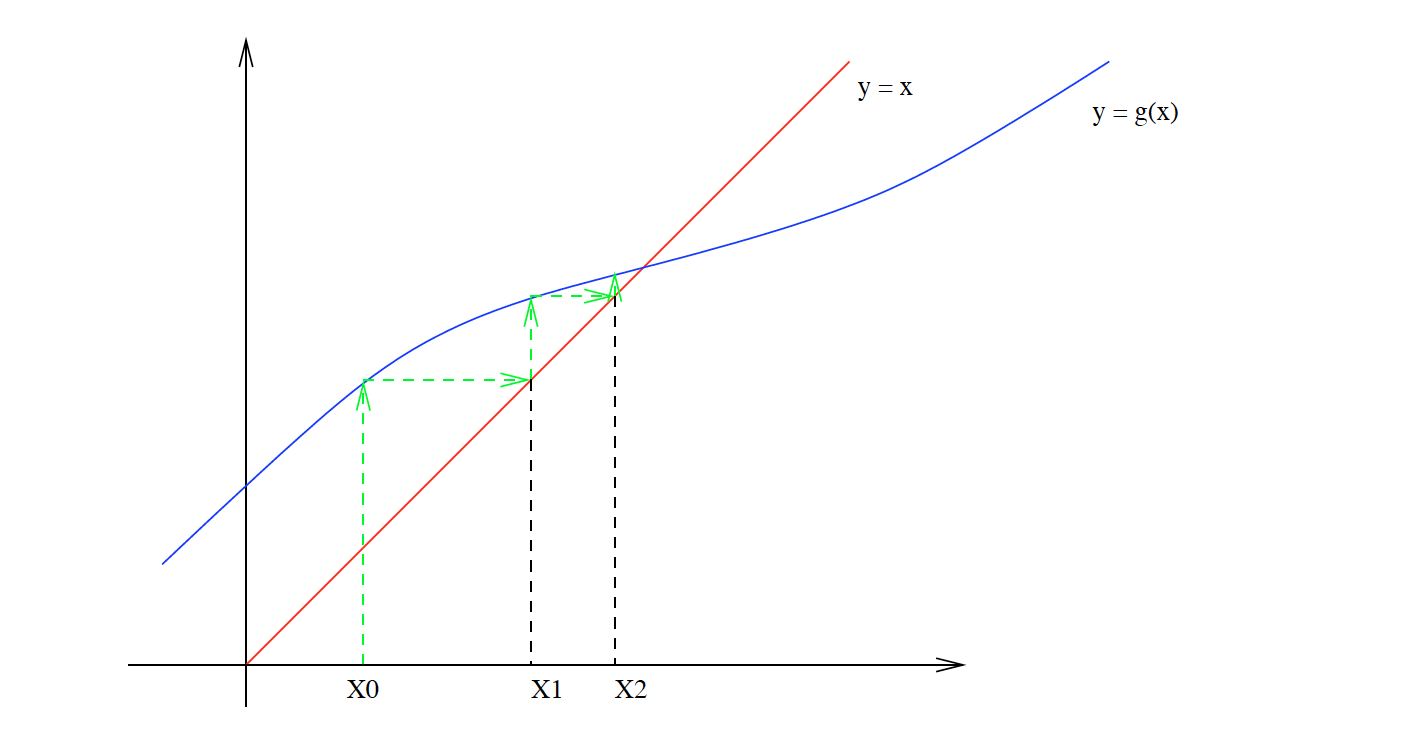

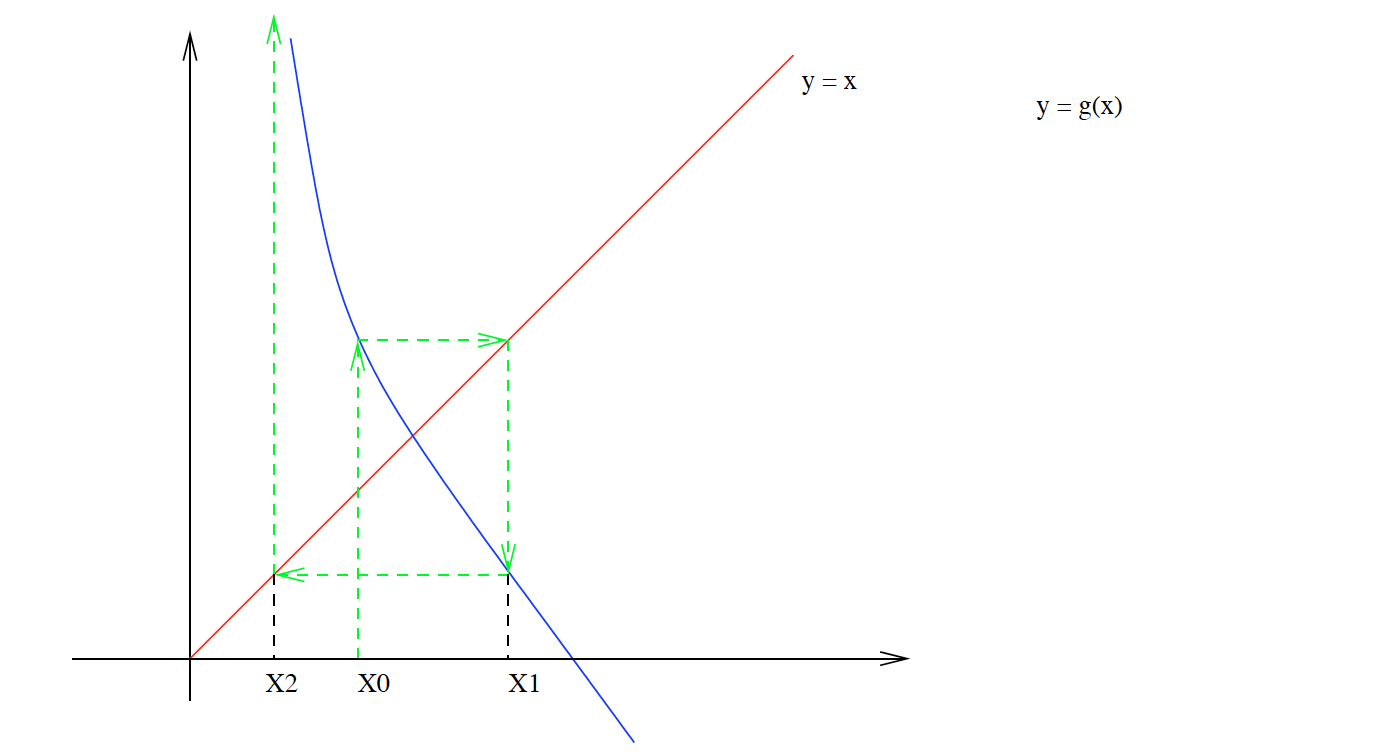

**Remarks:**

Let us denote $g$ a function verifying: $g(x^*) = x^*$.

- If $|g'(x^*)|<1$ then there exists an interval on which the iteration $x_{k+1} = g(x_k)$ converge


- If $|g'(x^*)|>1$ then the iteration $x_{k+1} = g(x_k)$ diverge


- If $g'(x^*) = 0$ then the convergence is at least **quadratic** else it is in general linear.

## 4. Newton's method <a name="4"></a>

- The newton iteration is defined by:
$$
x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}
$$

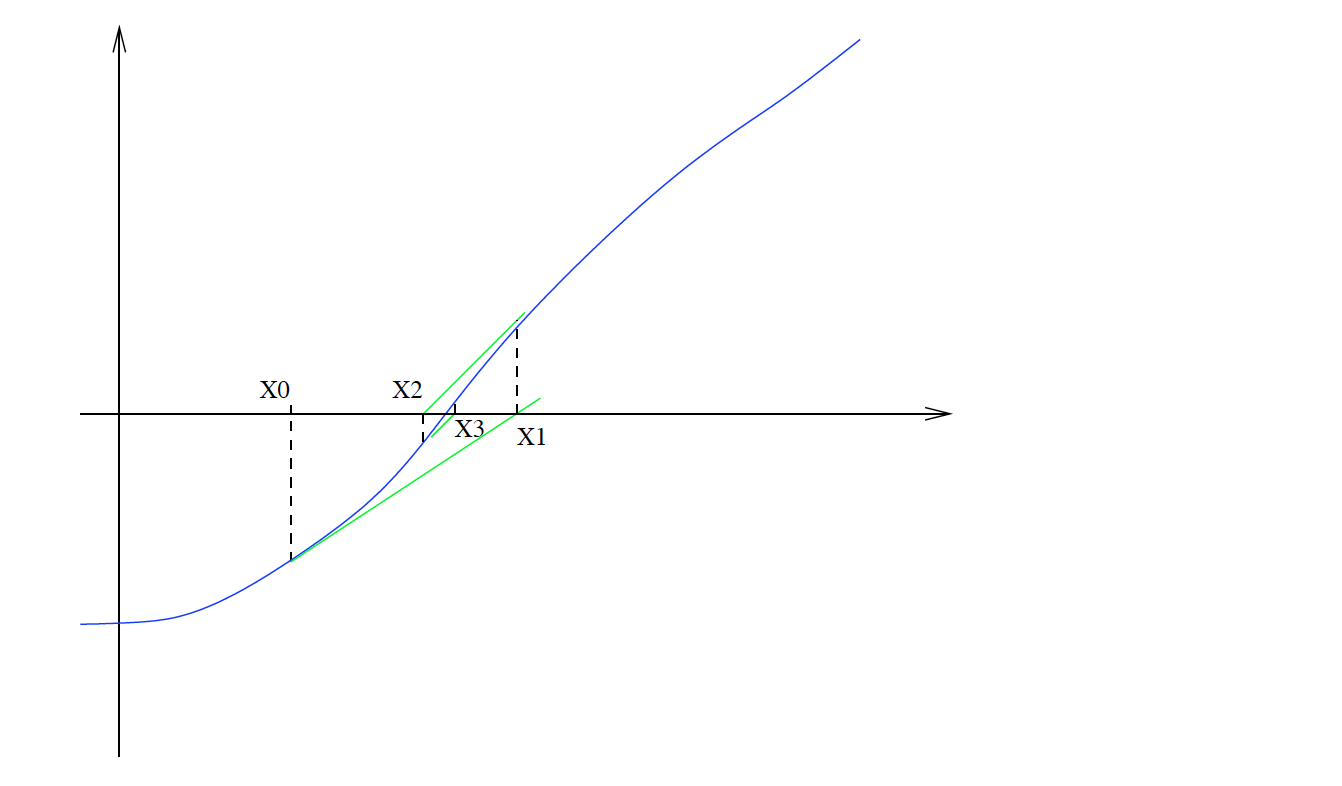

**Remarks:**

- Solving $f(x) = 0$ can be reduced to a fixed point problem with the function $g$ such that:

$$
g(x) = x - \dfrac{f(x)}{f'(x)}
$$


- Since $x^*$ is a simple root of $f(x)$, we have $g'(x^*) = 0$, which ensures **quadratic convergence** provided we start on a small neighbourhood of $x^*$.

## 5. Exercices <a name="E"></a>

In dimension 1.

### Exercice 1: bisection method <a name="E1"></a>

Define a function `bisection(f, a, b, eps)` that iteratively solves the system $f(x) = 0$ in the interval $[a,b]$ (for a given tolerance $eps$) using a bisection method. Implement this method on $f(x) = x^{3} - 7x + 2$ in $[0, 1]$.

### Exercice 2: fixed-point iteration method <a name="E2"></a>

Define a function `fixed_point` that iteratively solves, with a fixed-point iteration method, a nonlinear system $f(x) = 0$ with $f(x) = x^{3} - 7x + 2$.

### Exercice 3: newton's method <a name="E3"></a>

Define a function `newton` that iteratively solves, with a newton's method, a nonlinear system $f(x) = 0$ with $f(x) = x^{3} - 7x + 2$.

## 6. Solving $A\times X = B$ <a name="6"></a>

Let us solve the system:

$$
\begin{bmatrix}
a_{0, 0} & a_{0, 1} & a_{0, 2}\\
a_{1, 0} & a_{1, 1} & a_{1, 2}\\
a_{2, 0} & a_{2, 1} & a_{2, 2}\\
\end{bmatrix} \times
\begin{bmatrix}
x_{0, 0} & x_{0, 1} & x_{0, 2}\\
x_{1, 0} & x_{1, 1} & x_{1, 2}\\
x_{2, 0} & x_{2, 1} & x_{2, 2}\\
\end{bmatrix} = 
\begin{bmatrix}
b_{0, 0} & b_{0, 1} & b_{0, 2}\\
b_{1, 0} & b_{1, 1} & b_{1, 2}\\
b_{2, 0} & b_{2, 1} & b_{2, 2}
\end{bmatrix} \iff A\times X = B
$$

This is equivalent to solving the systems with the Gauss method:

$$
\begin{bmatrix}
a_{0, 0} & a_{0, 1} & a_{0, 2}\\
a_{1, 0} & a_{1, 1} & a_{1, 2}\\
a_{2, 0} & a_{2, 1} & a_{2, 2}
\end{bmatrix} \times
\begin{bmatrix}
x_{0, j}\\
x_{1, j}\\
x_{2, j}
\end{bmatrix} = 
\begin{bmatrix}
b_{0, j}\\
b_{1, j}\\
b_{2, j}
\end{bmatrix} \iff A\times X_j = B_j
$$

For a matrix $n\times n$, the use of the Gauss reduction requires:

- **Triangularisation of $A$:** $\dfrac{n(n-1)(2n-1)}{6}$ operations


- **Updating of $B$:** $\dfrac{n(n-1)}{2}$ operations


- **Upward resolution:** $\dfrac{n(n+1)}{2}$ operations

$\implies \dfrac{n^4}{3}$ **operations**

The problem with this approach is that when triangularising the matrix $A$ the vector $B_j$ must be updated.

### LU decomposition

Suppose that a matrix $A$ can be decomposed as a product: $A = L\times U$ where $L$ is a lower triangular matrix and $U$ an upper triangular matrix. Therefore:

$$
A\times X = B \iff L\times U\times X = B
$$

An improved approach would be to use the **LU decomposition** as follows:

1. Solving $L \times Y = B$, with $Y$ the (intermediate) unknown variable


2. Solving $U \times X = Y$, with $X$ the (wanted) unknown variable


3. Therefore $X$ is solution of $L\times U\times X = B$, in other words, the solution of $A\times X = B$


**Example of LU decomposition:**

$$
\begin{bmatrix}
10 & 7 & 8\\
7 & 5 & 6\\
8 & 6 & 10
\end{bmatrix} = \begin{bmatrix}
1 & 0 & 0\\
7/10 & 1 & 0\\
4/5 & 4 & 1
\end{bmatrix} \times 
\begin{bmatrix}
10 & 7 & 8\\
0 & 1/10 & 2/5\\
0 & 0 & 2
\end{bmatrix} \iff A = L \times U
$$

**pseudo-code of the LU decomposition:**

```
LU_decomposition(A)
    Input : square matrix A of dimension n
    Output : L the lower triangular matrix and U an upper triangular matrix
    
    L = Identity matrix
    U = A
    for i=0 to n-1 do:
        for j=i+1 to n-1 do:
            L[j, i] = (U[j, i]/U[i, i])
            U[j, i..] = U[j, i..] - L[j, i] * U[i, i..]
```

**Remarks:**
the naive approach may not give a solution if the pivot is zero, whereas the system can be solved
(the Gauss pivot method requires exchanging rows in case of a zero pivot).

### (optional) Exercice 4: LU decomposition <a name="E4"></a>

1. Create a function that solves $A\times X = B$ with LU decomposition;
2. Compute (theoretically) the complexity of this algorithm.

### (optional) Exercice 5: Matrix inversion <a name="E5"></a>

1. Thanks to the LU decomposition, propose a method of matrix inversion;
2. Implement your methodology.